# Banking Customer Churn Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

C:\Users\Anshu Pandey\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 2. Data Collection and Exploration

In [2]:
df = pd.read_csv("datasets-1/Bank_churn_modelling.csv")
df.shape

(10000, 14)

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df.describe()

RowNumber    CustomerId   CreditScore           Age       Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  9985.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800     5.013721   
std     2886.89568  7.193619e+04     96.653299     10.487806     2.892213   
min        1.00000  1.556570e+07    350.000000     18.000000     0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000     3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000     5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000     7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000    10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count      9990.000000  10000.000000  
mean     100127.441333      0.203700  
std       57497.228065      0.402769  
min          11.580000      0.000000  
25%       51112.885000      0.000000  
50%      100238.110000      0.000000  
75%      149400.922500      0.000000  
max      199992.480000      1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9985 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9990 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

### Observations

- Target Attribute: Churn

- Features:
    - Demographic info: Age, Gender, Geography
    - Financial Capability of customer: CreditScore, Balance, EstimatedSalary
    - Relation with Bank: NumOfProducts, IsActiveMember, HasCrCard, Tenure
    
    
 - unwanted columns: RowNumber, CustomerId, Surname
 - atleast 25% customers have 0 balance 
 - more than 50% of customers have only 1 product


## 3. Data Cleaning

In [8]:
# check for duplicates
df.duplicated().sum()

0

In [9]:
# check for missing values
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure             15
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary    10
Exited              0
dtype: int64

In [10]:
df[['Tenure','EstimatedSalary']].skew()

Tenure             0.010333
EstimatedSalary    0.001322
dtype: float64

In [11]:
# impute missing values by mean
df['Tenure'].fillna(df.Tenure.mean(),inplace=True)
df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean(),inplace=True)
df[['Tenure','EstimatedSalary']].isnull().sum()

C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_25008\3456684932.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tenure'].fillna(df.Tenure.mean(),inplace=True)
C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_25008\3456684932.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

Tenure             0
EstimatedSalary    0
dtype: int64

In [12]:
# Analyzing outliers
df.skew(numeric_only=True)

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010341
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.001323
Exited             1.471611
dtype: float64

In [13]:
# drop unwated columns
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## 4. Feature Engineering

### Data Visualization
#### Univariate Analysis
- Analyzing each attribute individually

In [14]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [15]:
import plotly.express as px

In [16]:
nums = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts',  'EstimatedSalary']
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

for col in nums+cats:
    fig = px.histogram(df,x=col)
    fig.show()

#### Observations:

- IsActiveMember: almost 50% of customers are not actively using banking products
- HasCrCard: 70% of customers have creditcard, 30% of customers do not have CC
- Geography: 50% of customers are from France, rest from Spain and Germany
- NumOfProducts: 95% of customers have either 1 or 2 products
- Balance: two groups, one has 0 balance, other has high balance b/w 50k to 200k
- Age: have some outliers

#### Bivariate Analysis

- num v/s cat: distplot
- cat v/s cat: countplot / barplot (aggregated - pivot data)
- num v/s num: scatterplot

C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_25008\262915479.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_25008\262915479.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a gu

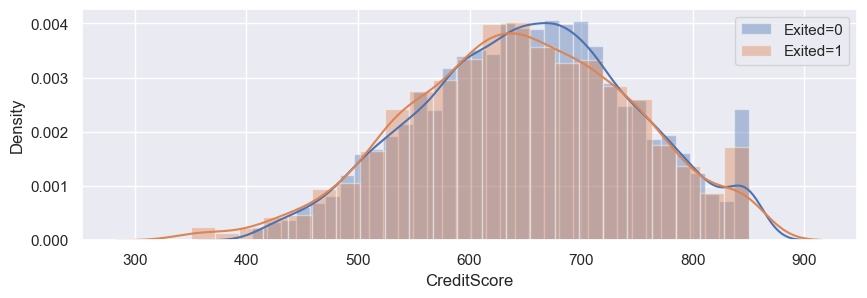

C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_25008\262915479.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_25008\262915479.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a gu

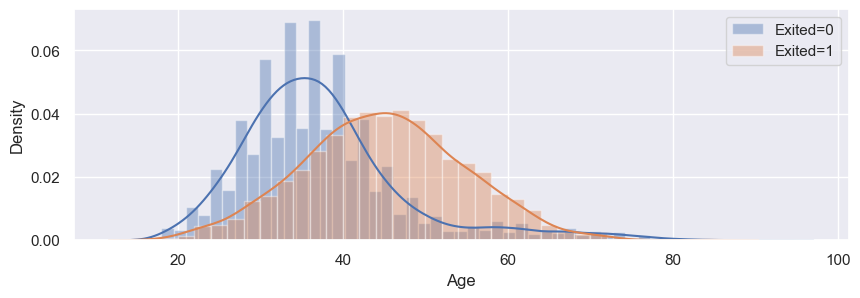

C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_25008\262915479.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_25008\262915479.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a gu

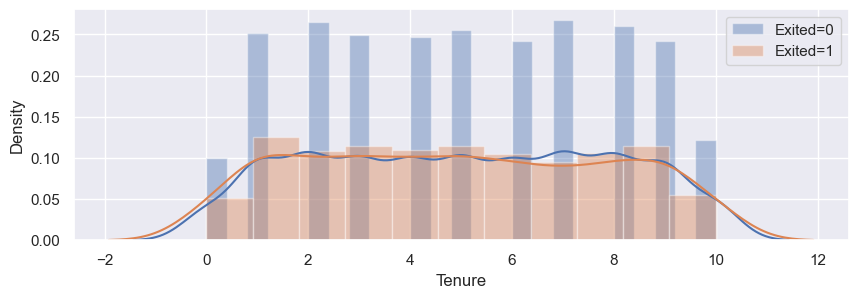

C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_25008\262915479.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_25008\262915479.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a gu

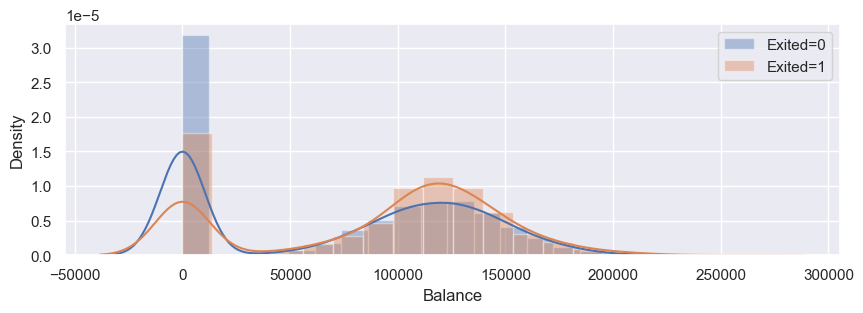

C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_25008\262915479.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_25008\262915479.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a gu

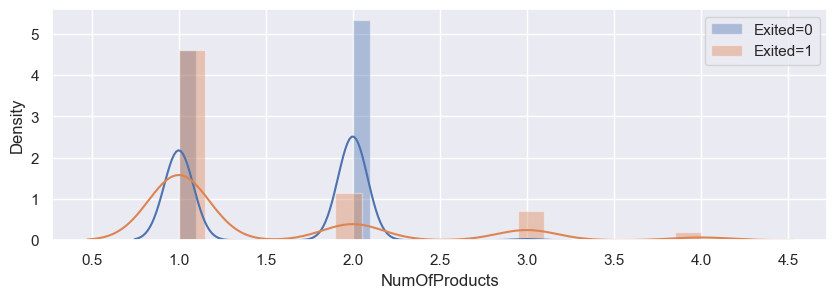

C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_25008\262915479.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_25008\262915479.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a gu

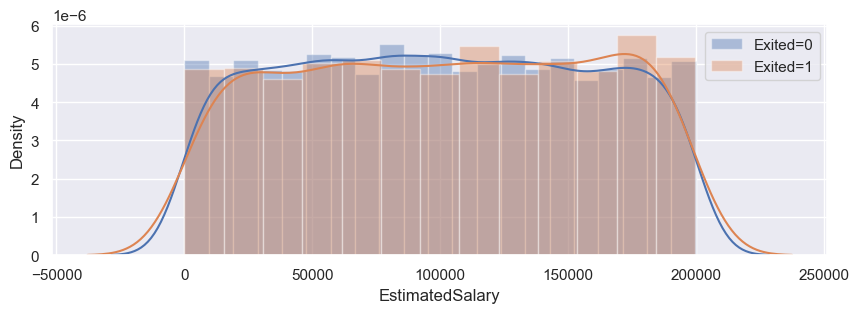

In [17]:
for col in nums: 
    plt.figure(figsize=(10,3))
    sns.distplot(df[col][df.Exited==0],label='Exited=0')
    sns.distplot(df[col][df.Exited==1],label='Exited=1')
    plt.legend()
    plt.show()

for columns Geography
Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000
Geography
France     0.161548
Germany    0.324432
Spain      0.166734
All        0.203700
dtype: float64


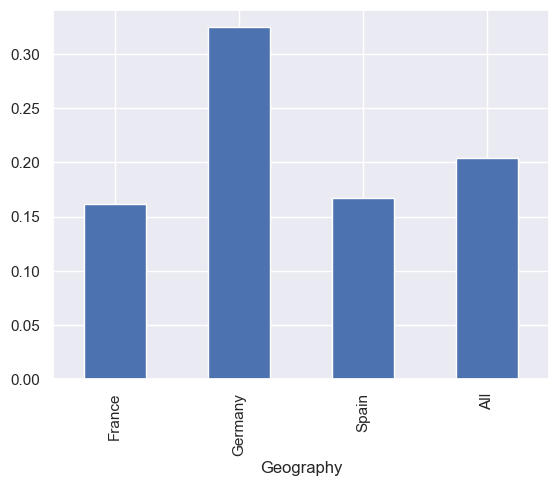

for columns Gender
Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000
Gender
Female    0.250715
Male      0.164559
All       0.203700
dtype: float64


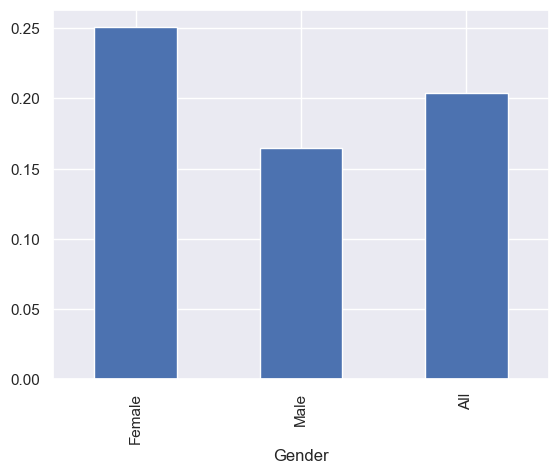

for columns HasCrCard
Exited        0     1    All
HasCrCard                   
0          2332   613   2945
1          5631  1424   7055
All        7963  2037  10000
HasCrCard
0      0.208149
1      0.201843
All    0.203700
dtype: float64


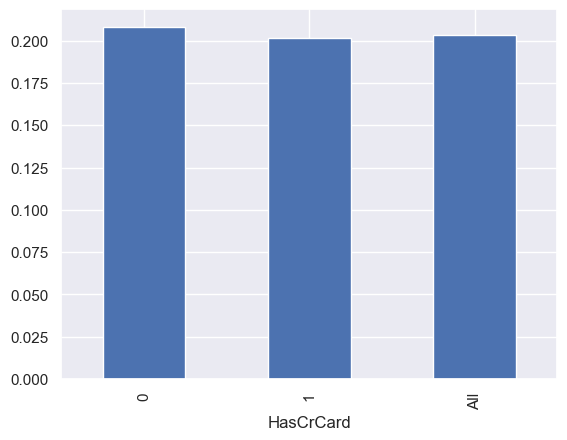

for columns IsActiveMember
Exited             0     1    All
IsActiveMember                   
0               3547  1302   4849
1               4416   735   5151
All             7963  2037  10000
IsActiveMember
0      0.268509
1      0.142691
All    0.203700
dtype: float64


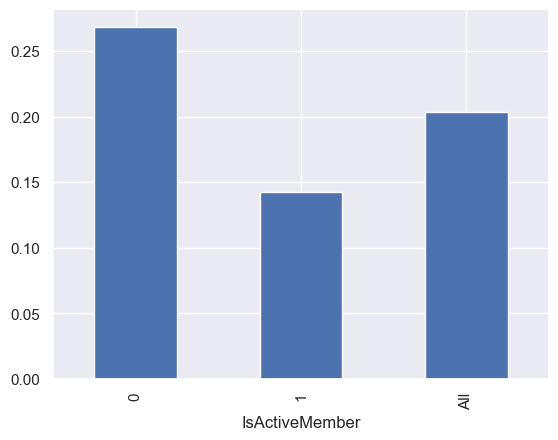

In [18]:
# cat v/s cat
for col in cats:
    pivot = pd.crosstab(df[col],df.Exited,margins=True)
    print(f"for columns {col}")
    print(pivot)
    print(pivot[1]/pivot['All'])
    (pivot[1]/pivot['All']).plot(kind='bar')
    plt.show()

#### Multivariate Analysis

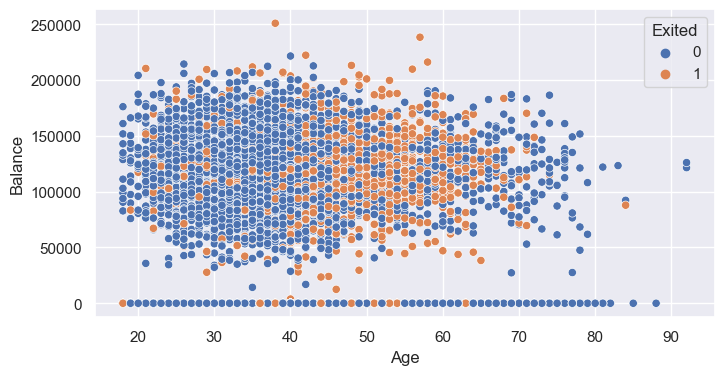

In [19]:
# age, balance, numofproducts, gender, geography

# num v/s num v/s cat
plt.figure(figsize=(8,4))
sns.scatterplot(x='Age',y='Balance',hue='Exited',data=df)
plt.show()

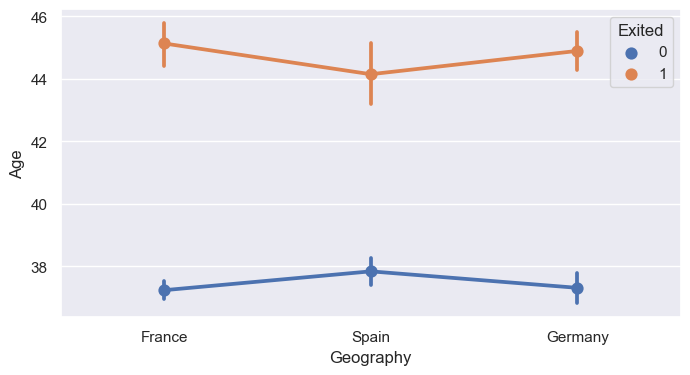

In [20]:
# age v/s geography v/s exited
plt.figure(figsize=(8,4))
sns.pointplot(x='Geography',y='Age',hue='Exited',data=df)
plt.show()

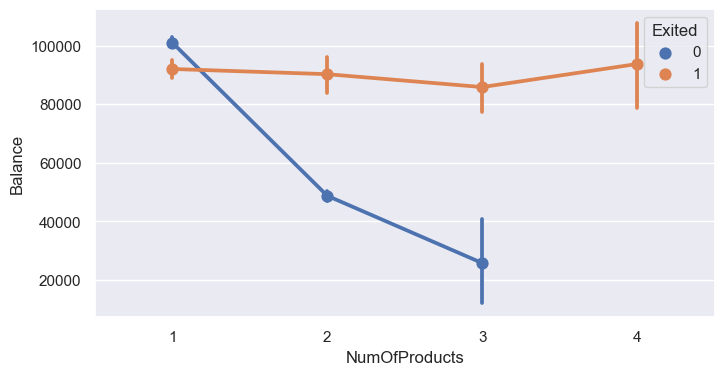

In [23]:
plt.figure(figsize=(8,4))
sns.pointplot(x='NumOfProducts',y='Balance',hue='Exited',data=df)
plt.show()

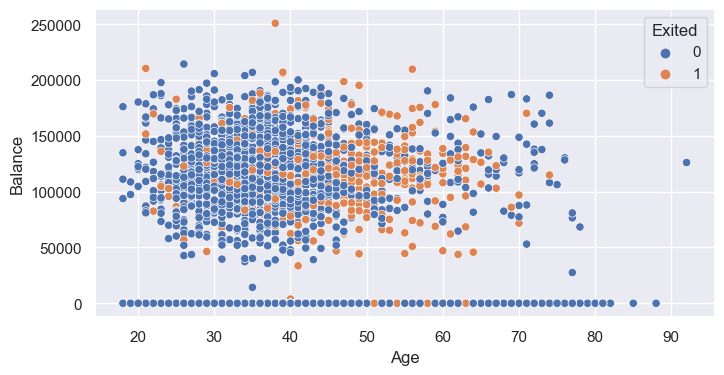

In [25]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Age',y='Balance',hue='Exited',data=df[df.NumOfProducts!=1])
plt.show()

### Statistical Research

In [26]:
# ANOVA - f test
xnum = df[nums]
y = df.Exited

from sklearn.feature_selection import f_classif
fscore,pvalue = f_classif(xnum,y)

for i in range(len(nums)): print(f" {nums[i]},   {pvalue[i]} ")

 CreditScore,   0.006738213892258643 
 Age,   1.2399313093415039e-186 
 Tenure,   0.1565917661952313 
 Balance,   1.275563319153163e-32 
 NumOfProducts,   1.7173330048040421e-06 
 EstimatedSalary,   0.21124537599025905 


In [27]:
# chi square test
xcat = df[cats]
y = df.Exited

from sklearn.preprocessing import LabelEncoder
xcat['Gender'] = LabelEncoder().fit_transform(xcat['Gender'])
xcat['Geography'] = LabelEncoder().fit_transform(xcat['Geography'])

from sklearn.feature_selection import chi2
chiscore, pvalue = chi2(xcat,y)

C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_25008\4183863844.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_25008\4183863844.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
for i in range(len(cats)): print(f" {cats[i]},   {pvalue[i]} ")

 Geography,   0.0005756078382573235 
 Gender,   7.015574513879596e-13 
 HasCrCard,   0.6984962089530451 
 IsActiveMember,   1.5680362405434552e-27 


In [29]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [30]:
# important features = CreditScore, Age, Balance, NumOfProducts, Geography, Gender, IsActiveMember
x = df[['CreditScore', 'Geography', 'Gender', 'Age','Balance',
       'NumOfProducts',  'IsActiveMember']]

y = df.Exited

## 5. Feature Preprocessing

In [32]:
x.head()

CreditScore Geography  Gender  Age    Balance  NumOfProducts  \
0          619    France  Female   42       0.00              1   
1          608     Spain  Female   41   83807.86              1   
2          502    France  Female   42  159660.80              3   
3          699    France  Female   39       0.00              2   
4          850     Spain  Female   43  125510.82              1   

   IsActiveMember  
0               1  
1               1  
2               0  
3               0  
4               1

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer([('ohe',OneHotEncoder(drop='first'),[1,2]),],remainder='passthrough')

x2 = transformer.fit_transform(x)
x2 = pd.DataFrame(x2,columns=transformer.get_feature_names_out())
x2.head()

ohe__Geography_Germany  ohe__Geography_Spain  ohe__Gender_Male  \
0                     0.0                   0.0               0.0   
1                     0.0                   1.0               0.0   
2                     0.0                   0.0               0.0   
3                     0.0                   0.0               0.0   
4                     0.0                   1.0               0.0   

   remainder__CreditScore  remainder__Age  remainder__Balance  \
0                   619.0            42.0                0.00   
1                   608.0            41.0            83807.86   
2                   502.0            42.0           159660.80   
3                   699.0            39.0                0.00   
4                   850.0            43.0           125510.82   

   remainder__NumOfProducts  remainder__IsActiveMember  
0                       1.0                        1.0  
1                       1.0                        1.0  
2                       3.0                        0.0  
3                       2.0                        0.0  
4                       1.0                        1.0

In [35]:
# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x2,y,test_size=0.2, random_state=50)
print(x2.shape,xtrain.shape,xtest.shape)
print(y.shape,ytrain.shape,ytest.shape)

(10000, 8) (8000, 8) (2000, 8)
(10000,) (8000,) (2000,)


## 6. APply Machine Learning

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


# train the model using train data: xtrain, ytrain

model.fit(xtrain,ytrain)

LogisticRegression()

In [37]:
# test: cs=650, geo=France, gender=male, age=45,balance=123432, nop=2, iam=1

testc=[[650,'France','Male',45,123432,2,1]]
testc = transformer.transform(testc)

model.predict(testc)

C:\Users\Anshu Pandey\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

C:\Users\Anshu Pandey\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([0], dtype=int64)

In [38]:
model.predict_proba(testc)

C:\Users\Anshu Pandey\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([[0.73042594, 0.26957406]])

In [39]:
## performance Analysis
from sklearn import metrics

ypred = model.predict(xtest)

accuracy = metrics.accuracy_score(ytest,ypred)
print(accuracy)

0.7885


In [41]:
print(f"Recall {metrics.recall_score(ytest,ypred)} ")
print(f"Precision {metrics.precision_score(ytest,ypred)} ")
print(f"F1 Score {metrics.f1_score(ytest,ypred)} ")
print(f"Confusion Matrix \n {metrics.confusion_matrix(ytest,ypred)} ")

Recall 0.0472636815920398 
Precision 0.3220338983050847 
F1 Score 0.08242950108459869 
Confusion Matrix 
 [[1558   40]
 [ 383   19]] 


## Optimization
### Scaling Features

In [42]:
x.head(2)

CreditScore Geography  Gender  Age   Balance  NumOfProducts  IsActiveMember
0          619    France  Female   42      0.00              1               1
1          608     Spain  Female   41  83807.86              1               1

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

transformer = ColumnTransformer([('ohe',OneHotEncoder(drop='first'),[1,2]),
                                 ('sc',StandardScaler(),[0,3,4,5]),],remainder='passthrough')

x2 = transformer.fit_transform(x)
x2 = pd.DataFrame(x2,columns=transformer.get_feature_names_out())
x2.head()

ohe__Geography_Germany  ohe__Geography_Spain  ohe__Gender_Male  \
0                     0.0                   0.0               0.0   
1                     0.0                   1.0               0.0   
2                     0.0                   0.0               0.0   
3                     0.0                   0.0               0.0   
4                     0.0                   1.0               0.0   

   sc__CreditScore   sc__Age  sc__Balance  sc__NumOfProducts  \
0        -0.326221  0.293517    -1.225848          -0.911583   
1        -0.440036  0.198164     0.117350          -0.911583   
2        -1.536794  0.293517     1.333053           2.527057   
3         0.501521  0.007457    -1.225848           0.807737   
4         2.063884  0.388871     0.785728          -0.911583   

   remainder__IsActiveMember  
0                        1.0  
1                        1.0  
2                        0.0  
3                        0.0  
4                        1.0

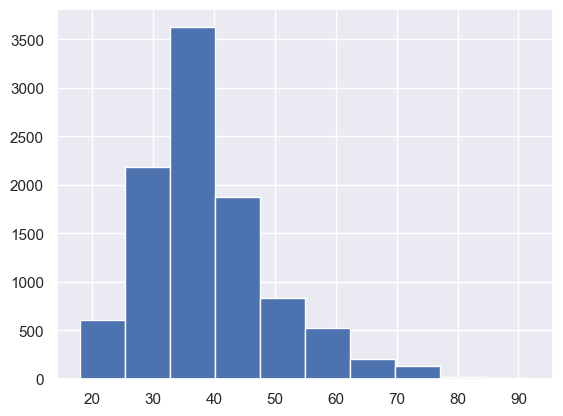

In [47]:
plt.hist(x['Age'])
plt.show()

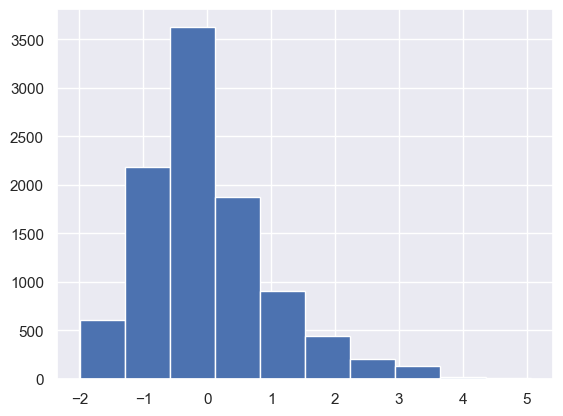

In [49]:
plt.hist(x2['sc__Age'])
plt.show()

In [44]:
# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x2,y,test_size=0.2, random_state=50)
print(x2.shape,xtrain.shape,xtest.shape)
print(y.shape,ytrain.shape,ytest.shape)

(10000, 8) (8000, 8) (2000, 8)
(10000,) (8000,) (2000,)


In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# train the model using train data: xtrain, ytrain
model.fit(xtrain,ytrain)

## performance Analysis
from sklearn import metrics

ypred = model.predict(xtest)
print(f"Accuracy {metrics.accuracy_score(ytest,ypred)} ")
print(f"Recall {metrics.recall_score(ytest,ypred)} ")
print(f"Precision {metrics.precision_score(ytest,ypred)} ")
print(f"F1 Score {metrics.f1_score(ytest,ypred)} ")
print(f"Confusion Matrix \n {metrics.confusion_matrix(ytest,ypred)} ")

Accuracy 0.814 
Recall 0.23383084577114427 
Precision 0.5949367088607594 
F1 Score 0.33571428571428563 
Confusion Matrix 
 [[1534   64]
 [ 308   94]] 


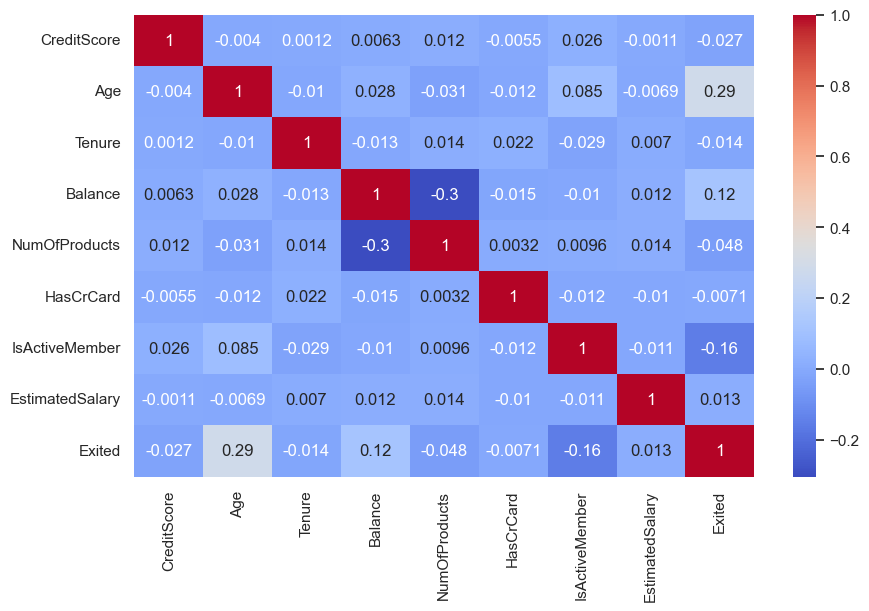

In [52]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

## ML Modelling with KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=3)

model2.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [54]:
## performance Analysis
from sklearn import metrics

ypred = model2.predict(xtest)
print(f"Accuracy {metrics.accuracy_score(ytest,ypred)} ")
print(f"Recall {metrics.recall_score(ytest,ypred)} ")
print(f"Precision {metrics.precision_score(ytest,ypred)} ")
print(f"F1 Score {metrics.f1_score(ytest,ypred)} ")
print(f"Confusion Matrix \n {metrics.confusion_matrix(ytest,ypred)} ")

Accuracy 0.829 
Recall 0.4925373134328358 
Precision 0.5892857142857143 
F1 Score 0.5365853658536586 
Confusion Matrix 
 [[1460  138]
 [ 204  198]] 


## ML modelling with Decision Tree

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer([('ohe',OneHotEncoder(drop='first'),[1,2]),],remainder='passthrough')

x2 = transformer.fit_transform(x)
x2 = pd.DataFrame(x2,columns=transformer.get_feature_names_out())

# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x2,y,test_size=0.2, random_state=50)
print(x2.shape,xtrain.shape,xtest.shape)
print(y.shape,ytrain.shape,ytest.shape)

(10000, 8) (8000, 8) (2000, 8)
(10000,) (8000,) (2000,)


In [60]:
from sklearn.tree import DecisionTreeClassifier

model3=DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=12,
                             max_leaf_nodes=50)
model3.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=12, max_leaf_nodes=50,
                       random_state=10)

In [61]:
## performance Analysis
from sklearn import metrics

ypred = model3.predict(xtest)
print(f"Accuracy {metrics.accuracy_score(ytest,ypred)} ")
print(f"Recall {metrics.recall_score(ytest,ypred)} ")
print(f"Precision {metrics.precision_score(ytest,ypred)} ")
print(f"F1 Score {metrics.f1_score(ytest,ypred)} ")
print(f"Confusion Matrix \n {metrics.confusion_matrix(ytest,ypred)} ")

Accuracy 0.849 
Recall 0.5 
Precision 0.6655629139072847 
F1 Score 0.5710227272727273 
Confusion Matrix 
 [[1497  101]
 [ 201  201]] 


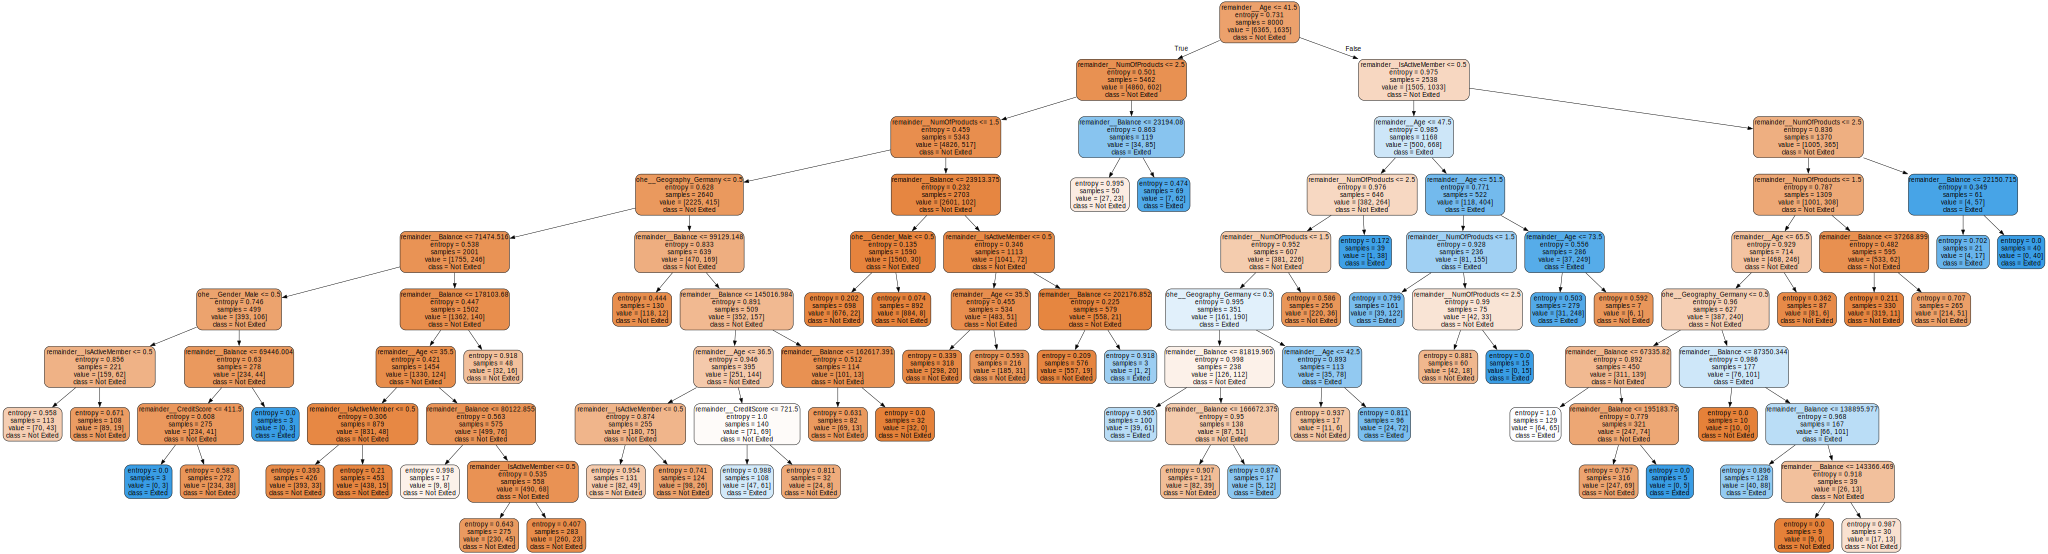

In [62]:
from sklearn import tree
graphdata = tree.export_graphviz(model3,
                                feature_names=transformer.get_feature_names_out(),
                                 rounded=True, filled=True,
                                class_names=['Not Exited','Exited'])

import graphviz
graph = graphviz.Source(graphdata)
graph

In [63]:
from sklearn.tree import DecisionTreeClassifier

model4=DecisionTreeClassifier(criterion='entropy',random_state=10,)
model4.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [65]:
## performance Analysis
from sklearn import metrics

ypred = model4.predict(xtest)
print(f"Accuracy {metrics.accuracy_score(ytest,ypred)} ")
print(f"Recall {metrics.recall_score(ytest,ypred)} ")
print(f"Precision {metrics.precision_score(ytest,ypred)} ")
print(f"F1 Score {metrics.f1_score(ytest,ypred)} ")
print(f"Confusion Matrix \n {metrics.confusion_matrix(ytest,ypred)} ")

Accuracy 0.7865 
Recall 0.5373134328358209 
Precision 0.4726477024070022 
F1 Score 0.5029103608847497 
Confusion Matrix 
 [[1357  241]
 [ 186  216]] 


In [69]:
ypred = model4.predict(xtrain)
print(f"Accuracy {metrics.accuracy_score(ytrain,ypred)} ")
print(f"Recall {metrics.recall_score(ytrain,ypred)} ")
print(f"Precision {metrics.precision_score(ytrain,ypred)} ")
print(f"F1 Score {metrics.f1_score(ytrain,ypred)} ")
print(f"Confusion Matrix \n {metrics.confusion_matrix(ytrain,ypred)} ")

Accuracy 0.999625 
Recall 0.998165137614679 
Precision 1.0 
F1 Score 0.9990817263544537 
Confusion Matrix 
 [[6365    0]
 [   3 1632]] 


In [70]:
from sklearn.tree import DecisionTreeClassifier

model5=DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=15,
                             min_samples_leaf=10,)
model5.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=10,
                       random_state=10)

In [71]:
## performance Analysis
from sklearn import metrics

ypred = model5.predict(xtest)
print(f"Accuracy {metrics.accuracy_score(ytest,ypred)} ")
print(f"Recall {metrics.recall_score(ytest,ypred)} ")
print(f"Precision {metrics.precision_score(ytest,ypred)} ")
print(f"F1 Score {metrics.f1_score(ytest,ypred)} ")
print(f"Confusion Matrix \n {metrics.confusion_matrix(ytest,ypred)} ")

Accuracy 0.8415 
Recall 0.5074626865671642 
Precision 0.631578947368421 
F1 Score 0.5627586206896552 
Confusion Matrix 
 [[1479  119]
 [ 198  204]] 


In [72]:
ypred = model5.predict(xtrain)
print(f"Accuracy {metrics.accuracy_score(ytrain,ypred)} ")
print(f"Recall {metrics.recall_score(ytrain,ypred)} ")
print(f"Precision {metrics.precision_score(ytrain,ypred)} ")
print(f"F1 Score {metrics.f1_score(ytrain,ypred)} ")
print(f"Confusion Matrix \n {metrics.confusion_matrix(ytrain,ypred)} ")

Accuracy 0.888125 
Recall 0.6012232415902141 
Precision 0.8017944535073409 
F1 Score 0.6871723173715485 
Confusion Matrix 
 [[6122  243]
 [ 652  983]] 


### ML Modelling with Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=10,
                               min_samples_leaf=30)

model6.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=10, min_samples_leaf=30, n_estimators=150,
                       random_state=10)

In [79]:
## performance Analysis
from sklearn import metrics

ypred = model6.predict(xtest)
print(f"Accuracy {metrics.accuracy_score(ytest,ypred)} ")
print(f"Recall {metrics.recall_score(ytest,ypred)} ")
print(f"Precision {metrics.precision_score(ytest,ypred)} ")
print(f"F1 Score {metrics.f1_score(ytest,ypred)} ")
print(f"Confusion Matrix \n {metrics.confusion_matrix(ytest,ypred)} ")

Accuracy 0.8595 
Recall 0.417910447761194 
Precision 0.7813953488372093 
F1 Score 0.5445705024311184 
Confusion Matrix 
 [[1551   47]
 [ 234  168]] 


In [80]:
model6[2]

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=30,
                       random_state=89128932)

In [81]:
model6.feature_importances_

array([0.06434999, 0.00533004, 0.02336625, 0.03803881, 0.41354876,
       0.09214455, 0.27557339, 0.0876482 ])

In [82]:
for i in range(len(x2.columns)): print(x2.columns[i]," : ", model6.feature_importances_[i])

ohe__Geography_Germany  :  0.06434999208190133
ohe__Geography_Spain  :  0.005330042076785706
ohe__Gender_Male  :  0.023366254565145118
remainder__CreditScore  :  0.03803881204658768
remainder__Age  :  0.4135487569179578
remainder__Balance  :  0.09214455108358471
remainder__NumOfProducts  :  0.27557338712290524
remainder__IsActiveMember  :  0.08764820410513231
